In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200

from src.visualization import plot_histogram_with_stats

In [2]:
# reading the data
df = pd.read_csv('../data/RTAQI_update.csv')

In [3]:
# displaying the data
display(df.head(),df.tail(),df.sample(5))

,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2024-04-14 11:00:00,NH3,2.0,4.0,4.0
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2024-04-14 11:00:00,SO2,9.0,14.0,12.0
2,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",2024-04-14 11:00:00,PM2.5,42.0,246.0,74.0
3,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",2024-04-14 11:00:00,PM10,46.0,156.0,74.0
4,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",2024-04-14 11:00:00,SO2,11.0,12.0,11.0


,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3228,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,PM2.5,78.0,103.0,91.0
3229,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,PM10,100.0,131.0,111.0
3230,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,CO,69.0,109.0,77.0
3231,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,OZONE,11.0,86.0,29.0
3232,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2024-04-14 11:00:00,PM10,72.0,131.0,102.0


,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
2235,Maharashtra,Boisar,"Khaira, Boisar - MPCB",2024-04-14 11:00:00,PM10,54.34965,182.780886,96.540793
1930,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,NO2,5.00000,10.000000,8.000000
3130,Uttar_Pradesh,Baghpat,"Sardar Patel Inter College, Baghpat - UPPCB",2024-04-14 11:00:00,NO2,20.00000,45.000000,27.000000
1626,Maharashtra,Mumbai,"Chakala-Andheri East, Mumbai - IITM",2024-04-14 11:00:00,CO,12.00000,50.000000,48.000000
1587,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",2024-04-14 11:00:00,CO,6.00000,45.000000,19.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          3233 non-null   object 
 1   city           3233 non-null   object 
 2   station        3233 non-null   object 
 3   last_update    3233 non-null   object 
 4   pollutant_id   3233 non-null   object 
 5   pollutant_min  3233 non-null   float64
 6   pollutant_max  3233 non-null   float64
 7   pollutant_avg  3233 non-null   float64
dtypes: float64(3), object(5)
memory usage: 202.2+ KB


In [5]:
df.describe()

,pollutant_min,pollutant_max,pollutant_avg
count,3233.000000,3233.000000,3233.000000
mean,23.538871,81.495185,42.171106
std,24.871403,91.543673,42.921555
min,1.000000,1.000000,1.000000
25%,6.000000,20.000000,12.000000
50%,15.965909,51.000000,29.000000
75%,34.000000,105.000000,58.000000
max,306.000000,500.000000,340.000000


# Histograms

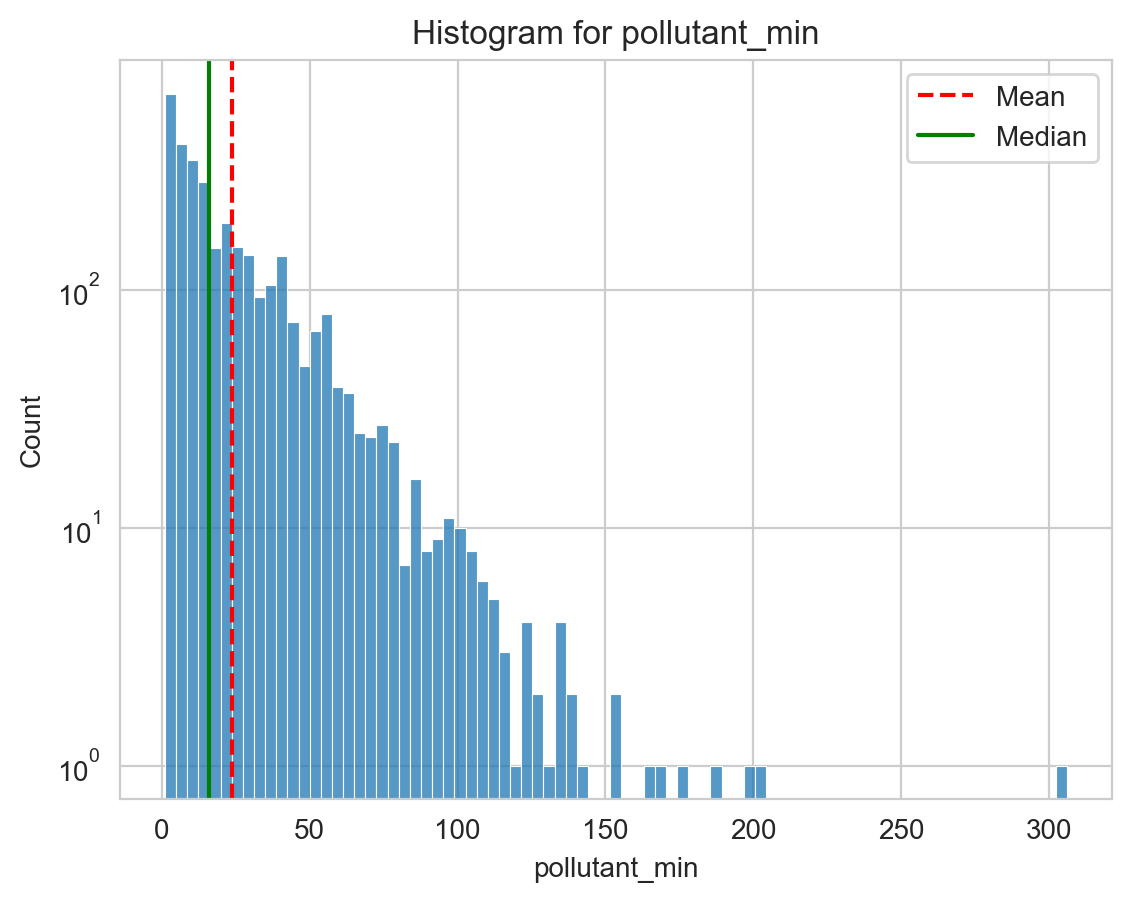

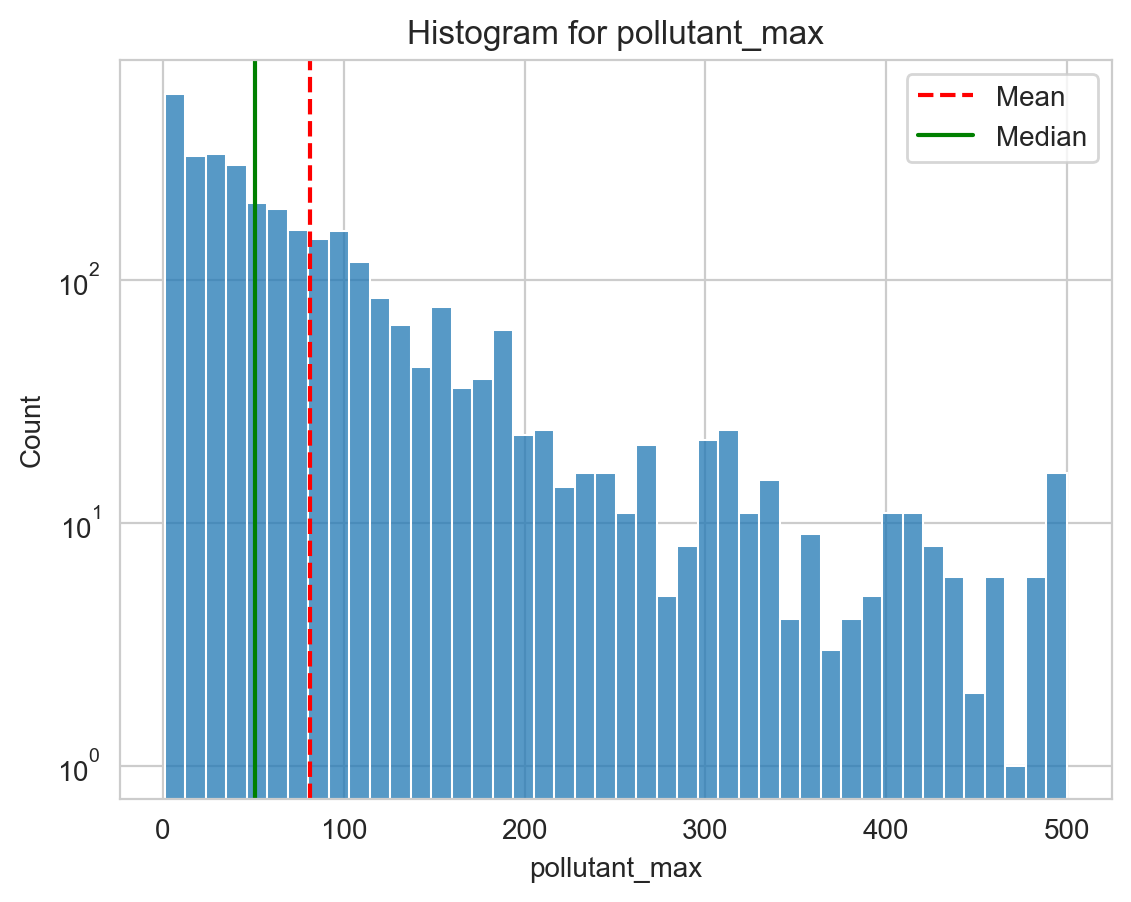

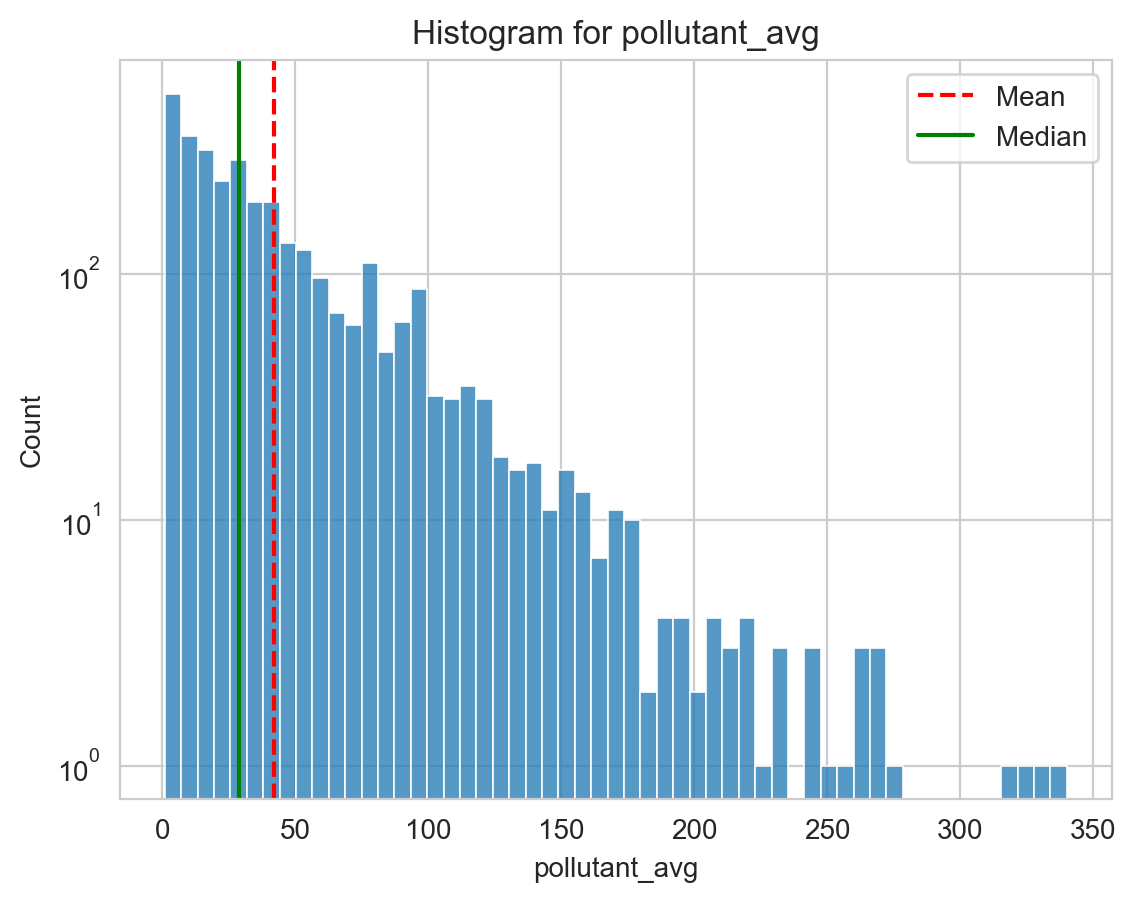

In [7]:
numerical_columns = df.describe().columns.to_list()

plot_histogram_with_stats(df, numerical_columns, yscale=True)

- We can see there is a left skew in all three fields i.e. min, max and average. 
- Left skew dominance explains that most of the data is concentrated towards the lower half of the data, meaning generally the AQI values are on the lower end
- Another thing to consider is the minimum and average AQI the mean does not cross 50 and in terms of the average AQI (aka mean lol) the mean and median are still under 100
- There can be potential outliers in the data that can suggest that at times the AQI values go above the average score hence resulting in bad air quality.

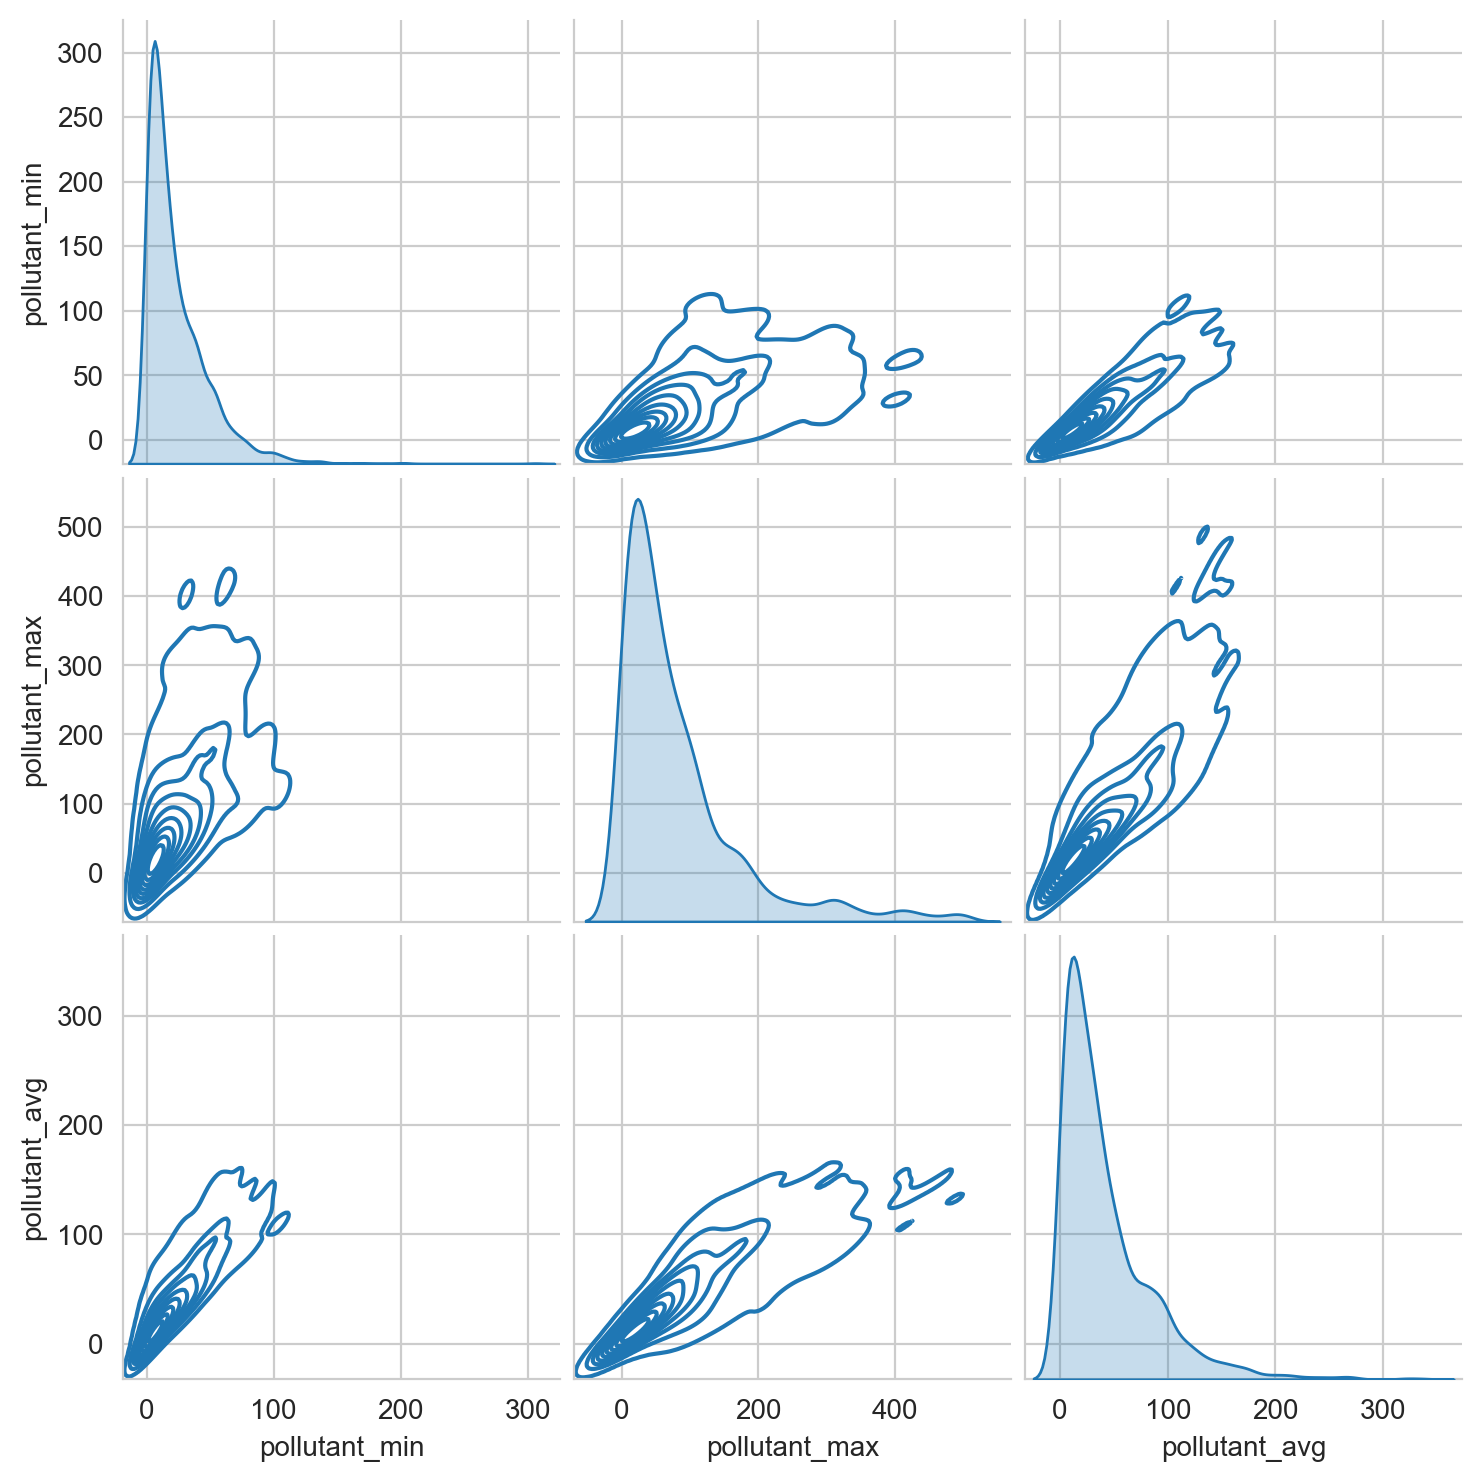

In [12]:
sns.pairplot(df, kind='kde')
plt.show()

Since of all of them are component of the same score, hence they show positive correlation with each other